In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import polars as pl

In [3]:
works_topics = pl.read_parquet("../data/modelling/works_post_topics.parquet")
topics_to_words = pl.read_csv("../data/modelling/topic_words.csv")
# number of works (for the next groupby)
works_topics = works_topics.with_columns(
    number_of_works = pl.lit(1)
)
cols = [f"cited_by_count_{i}" for i in range(2012, 2025)]
cols += ["topic", "mncs", "number_of_works", "year","cited_by_count"]

works_topics

title,year,primary_topic,abstract,cited_by_count,mncs,countries_distinct_count,institutions_distinct_count,referenced_works_count,authors_count,review,meta_analysis,mean_past_contributions_authors,mean_past_mncs_authors,mean_past_contributions_institutions,mean_past_mncs_institutions,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,cited_by_count_2018,cited_by_count_2019,cited_by_count_2020,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,title_abstract,topic,number_of_works
str,i64,str,str,i64,f64,i64,i64,i64,i8,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,i32
"""on the pharmacological action …",1909,"""Chemistry and Stereochemistry …","""""",47,10.143885,1,1,0,2,false,false,0.0,1.0,0.0,1.0,null,1.0,null,null,null,null,null,null,1.0,null,null,null,1.0,"""on the pharmacological action …",-1,1
"""the antagonism of the adrenal …",1909,"""Hormonal Regulation and Hypert…","""""",15,3.23741,1,1,0,1,false,false,0.0,1.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,"""the antagonism of the adrenal …",97,1
"""quantitative experiments with …",1909,"""Tuberculosis Research and Epid…","""""",14,3.021583,1,1,0,1,false,false,0.0,1.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,"""quantitative experiments with …",56,1
"""the comparative toxicity of th…",1909,"""Pharmacological Effects and To…","""""",12,2.589928,1,1,0,2,false,false,0.0,1.0,0.0,1.0,1.0,1.0,null,null,null,null,null,null,null,null,null,null,null,"""the comparative toxicity of th…",5,1
"""on the relation between the to…",1909,"""Chemical Thermodynamics and Mo…","""""",11,2.374101,1,1,0,2,false,false,0.0,1.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,null,null,"""on the relation between the to…",3,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""the addis declaration on immun…",2024,"""HIV/AIDS Impact and Responses""","""""",0,0.0,1,1,13,13,false,false,1.538462,1.603876,47.0,1.454523,null,null,null,null,null,null,null,null,null,null,null,null,null,"""the addis declaration on immun…",8,1
"""mucosal immunization with an i…",2024,"""Influenza Virus Research Studi…","""""",0,0.0,1,2,43,10,false,false,0.9,0.6,66.0,0.259329,null,null,null,null,null,null,null,null,null,null,null,null,null,"""mucosal immunization with an i…",1,1
"""favorable nonclinical safety p…",2024,"""Respiratory viral infections r…","""""",0,0.0,1,2,36,7,false,false,0.142857,0.994786,380.625,1.458431,null,null,null,null,null,null,null,null,null,null,null,null,null,"""favorable nonclinical safety p…",90,1


In [4]:

group_topics =  (
    works_topics.select(cols)
    .group_by("topic")
    .agg(
        pl.col("mncs").mean().alias("mncs"),
        pl.col("number_of_works").sum().alias("number_of_works"),
        pl.col("cited_by_count").sum().alias("cited_by_count"),
        *[pl.col(f"cited_by_count_{i}").mean().alias(f"cited_by_count_{i}") for i in range(2012, 2025)],
    )
)
group_topics_number_of_works = (
    works_topics.select("topic", "year", "number_of_works")
    .group_by(["topic", "year"])
    .sum()
    .filter(pl.col("year").is_in(range(2012, 2025)))
)

group_topics_number_of_works = group_topics_number_of_works.pivot(index="topic", on="year", values="number_of_works").sort("topic").rename(lambda x: f"number_of_works_{x}").rename({"number_of_works_topic": "topic"})
group_topics = group_topics.join(group_topics_number_of_works, on="topic").fill_null(0)

In [5]:
group_topics

topic,mncs,number_of_works,cited_by_count,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,cited_by_count_2018,cited_by_count_2019,cited_by_count_2020,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,number_of_works_2017,number_of_works_2021,number_of_works_2013,number_of_works_2018,number_of_works_2023,number_of_works_2016,number_of_works_2022,number_of_works_2015,number_of_works_2020,number_of_works_2012,number_of_works_2014,number_of_works_2019,number_of_works_2024
i64,f64,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
-1,1.006528,351768,13528495,4.801132,4.806063,4.825566,4.645609,4.512661,4.455855,4.46767,4.629891,5.341657,5.483475,5.43937,5.333215,5.296439,10463,13368,8929,10048,13077,10316,13364,9856,12069,8477,9989,12551,14709
0,0.039983,23026,33780,4.130282,4.52518,3.971875,3.777143,3.234667,3.04185,3.289538,3.268623,3.43222,4.443299,4.753372,4.523156,3.980626,591,684,569,655,667,687,716,538,668,535,496,659,694
1,1.149696,38478,1716250,4.892313,4.96825,5.077445,4.885514,4.794378,4.695024,4.815524,5.120982,5.691667,5.959052,5.800109,5.470948,5.060019,1086,1971,1070,1089,1742,1179,2124,1003,1473,1030,1066,1173,1835
2,0.910058,11678,378167,3.755749,3.711598,3.645364,3.526892,3.460995,3.470841,3.614637,3.78705,5.223758,5.44931,5.298324,4.94263,4.973501,335,497,222,295,472,231,535,219,434,190,198,295,536
3,1.115389,8779,383542,4.994878,4.967123,5.160667,4.817029,4.884908,4.951331,4.86439,5.162396,5.753592,5.940693,5.979971,5.867759,5.925121,185,245,197,201,213,207,247,226,239,178,187,257,257
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
97,0.894423,1139,34604,3.783394,4.037313,4.041958,3.943574,4.053125,4.344928,4.091667,4.130751,4.664459,5.1875,5.319549,5.098497,5.045383,34,78,30,45,71,32,57,45,59,18,34,40,73
98,1.168138,1873,66631,4.868805,4.603306,4.574684,4.655422,4.584091,4.735586,4.76381,4.673203,5.668116,5.89612,6.128821,5.907869,6.557611,62,128,38,70,171,69,144,38,116,30,36,72,175
99,0.652584,203,4978,3.422222,3.4,3.641509,3.55102,3.290909,3.696429,3.173913,3.338462,4.405797,4.09589,3.559524,3.974026,3.630952,5,8,2,6,5,4,6,6,2,4,9,10,7


In [6]:
group_topicsyears =  (
    works_topics.select(["topic", "year", "mncs", "number_of_works"])
    .group_by(["topic", "year"])
    .sum()
    .sort("year")
    .with_columns(
        mncs=pl.col("mncs")/pl.col("number_of_works"),
        sum_cum_number_of_works=pl.col("number_of_works").cum_sum().over("topic") - pl.col("number_of_works")
    )
    .with_columns(
        sum_cum_mncs=pl.col("mncs").cum_sum().over("topic") - pl.col("mncs")
    )
    .with_columns(
        mean_cum_mncs=(pl.col("sum_cum_mncs")/pl.col("sum_cum_number_of_works")).fill_nan(1),
    )
)

topics_to_words_pandas = topics_to_words.to_pandas()

def get_topic_words(x):
    try:
        word1 = topics_to_words_pandas.loc[0, f"{x}"]
        word2 = topics_to_words_pandas.loc[1, f"{x}"]
        
        word1 = word1.split(",")[0].strip(" ('")
        word2 = word2.split(",")[0].strip(" ('")
        
        return f"{word1}_{word2}"
    except KeyError:
        return "Unknown"

group_topics = group_topics.with_columns(
    topic_name = pl.col("topic").map_elements(get_topic_words)
)

group_topics

topic,mncs,number_of_works,cited_by_count,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,cited_by_count_2018,cited_by_count_2019,cited_by_count_2020,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,number_of_works_2017,number_of_works_2021,number_of_works_2013,number_of_works_2018,number_of_works_2023,number_of_works_2016,number_of_works_2022,number_of_works_2015,number_of_works_2020,number_of_works_2012,number_of_works_2014,number_of_works_2019,number_of_works_2024,topic_name
i64,f64,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str
-1,1.006528,351768,13528495,4.801132,4.806063,4.825566,4.645609,4.512661,4.455855,4.46767,4.629891,5.341657,5.483475,5.43937,5.333215,5.296439,10463,13368,8929,10048,13077,10316,13364,9856,12069,8477,9989,12551,14709,"""action_sodium"""
0,0.039983,23026,33780,4.130282,4.52518,3.971875,3.777143,3.234667,3.04185,3.289538,3.268623,3.43222,4.443299,4.753372,4.523156,3.980626,591,684,569,655,667,687,716,538,668,535,496,659,694,"""_"""
1,1.149696,38478,1716250,4.892313,4.96825,5.077445,4.885514,4.794378,4.695024,4.815524,5.120982,5.691667,5.959052,5.800109,5.470948,5.060019,1086,1971,1070,1089,1742,1179,2124,1003,1473,1030,1066,1173,1835,"""sulfanilamide_infections"""
2,0.910058,11678,378167,3.755749,3.711598,3.645364,3.526892,3.460995,3.470841,3.614637,3.78705,5.223758,5.44931,5.298324,4.94263,4.973501,335,497,222,295,472,231,535,219,434,190,198,295,536,"""heart_frog"""
3,1.115389,8779,383542,4.994878,4.967123,5.160667,4.817029,4.884908,4.951331,4.86439,5.162396,5.753592,5.940693,5.979971,5.867759,5.925121,185,245,197,201,213,207,247,226,239,178,187,257,257,"""choline_acetyl"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
97,0.894423,1139,34604,3.783394,4.037313,4.041958,3.943574,4.053125,4.344928,4.091667,4.130751,4.664459,5.1875,5.319549,5.098497,5.045383,34,78,30,45,71,32,57,45,59,18,34,40,73,"""pancreatic_pancreas"""
98,1.168138,1873,66631,4.868805,4.603306,4.574684,4.655422,4.584091,4.735586,4.76381,4.673203,5.668116,5.89612,6.128821,5.907869,6.557611,62,128,38,70,171,69,144,38,116,30,36,72,175,"""glycosides_cardiac"""
99,0.652584,203,4978,3.422222,3.4,3.641509,3.55102,3.290909,3.696429,3.173913,3.338462,4.405797,4.09589,3.559524,3.974026,3.630952,5,8,2,6,5,4,6,6,2,4,9,10,7,"""phenanthrene_products"""


In [7]:
group_topics_pandas = group_topics.to_pandas()
group_topicsyears_pandas = group_topicsyears.to_pandas()
works_topics = works_topics.join(
    group_topics.select(["topic", "topic_name"]),
    on="topic",
    how="left"
)

C:\Users\noahr\AppData\Local\Temp\ipykernel_9536\3171076777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_topics_viz["mncs_viz"] = (group_topics_viz["mncs"] - group_topics_viz["mncs"].mean()) / group_topics_viz["mncs"].std() * 3
C:\Users\noahr\AppData\Local\Temp\ipykernel_9536\3171076777.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_topics_viz["number_of_works_log"] = np.log(group_topics_viz["number_of_works"])
C:\Users\noahr\AppData\Local\Temp\ipykernel_9536\3171076777.py:7: Setting

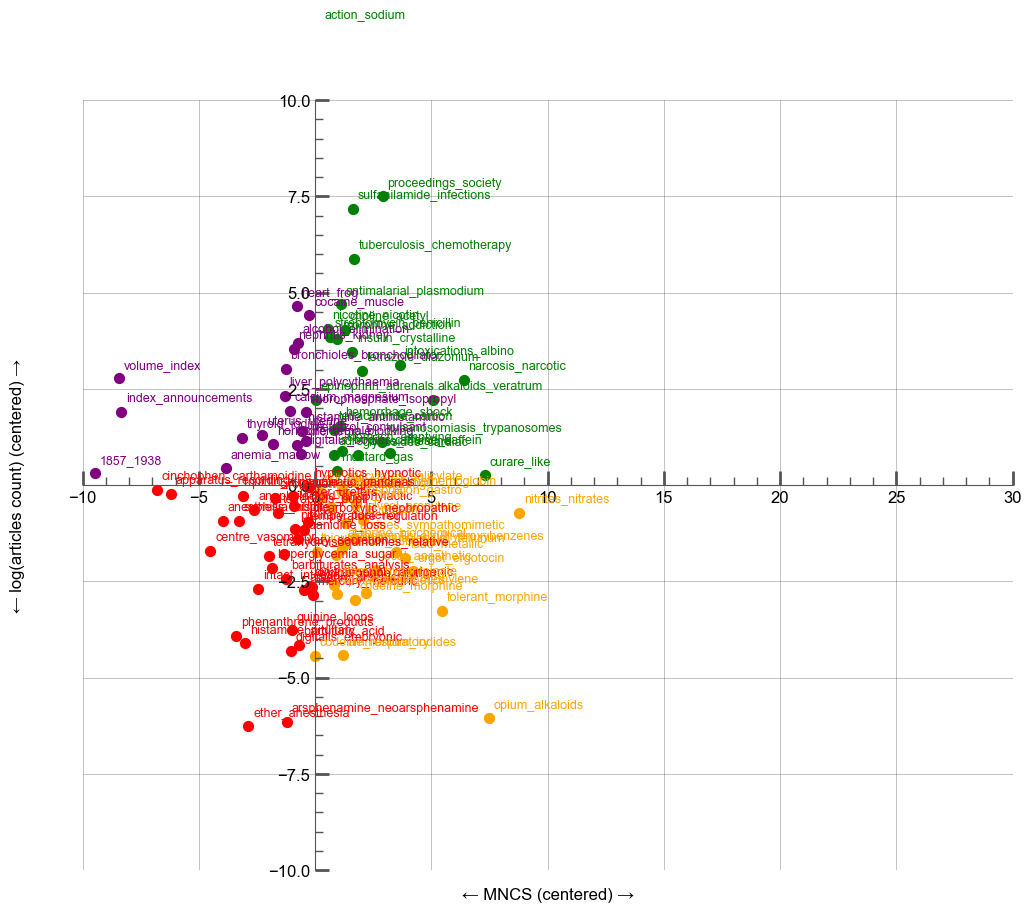

<Figure size 640x480 with 0 Axes>

In [8]:

import aquarel as aq

group_topics_viz = group_topics_pandas[group_topics_pandas["topic"] != -1]
group_topics_viz = group_topics_pandas[group_topics_pandas["topic"] != 0]
group_topics_viz["mncs_viz"] = (group_topics_viz["mncs"] - group_topics_viz["mncs"].mean()) / group_topics_viz["mncs"].std() * 3
group_topics_viz["number_of_works_log"] = np.log(group_topics_viz["number_of_works"])
group_topics_viz["number_of_works_viz"] = (group_topics_viz["number_of_works_log"] - group_topics_viz["number_of_works_log"].mean()) / group_topics_viz["number_of_works_log"].std() * 3

with aq.load_theme("scientific"):
    plt.figure(figsize=(12, 10))
    
    colors = {"green": "MNCS ≥ 0 & articles ≥ 0",
              "purple": "MNCS < 0 & articles ≥ 0",
              "red": "MNCS < 0 & articles < 0",
              "orange": "MNCS ≥ 0 & articles < 0"}

    for index, row in group_topics_viz.iterrows():
        if row["mncs_viz"] >= 0 and row["number_of_works_viz"] >= 0:
            color = "green"
        elif row["mncs_viz"] < 0 and row["number_of_works_viz"] >= 0:
            color = "purple"
        elif row["mncs_viz"] < 0 and row["number_of_works_viz"] < 0:
            color = "red"
        else:
            color = "orange"

        plt.scatter(row["mncs_viz"], row["number_of_works_viz"], color=color, s=50)
        plt.text(row["mncs_viz"] + 0.2, row["number_of_works_viz"] + 0.2, 
                 row["topic_name"], fontsize=9, color=color, ha='left', va='bottom')


    plt.xlim(-10, 30)
    plt.ylim(-10, 10)
    plt.xlabel("← MNCS (centered) →", labelpad=275)  # 10 suffit pour descendre sous l'axe
    plt.ylabel("← log(articles count) (centered) →", labelpad=175) 

    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.show()


In [10]:
works_topics = (
    works_topics
    .sort("year")
    .join(
        group_topicsyears.select(["topic", "year", "sum_cum_number_of_works", "mean_cum_mncs"]),
        on=["topic", "year"],
        how="left"
    )
    .rename({
        "sum_cum_number_of_works": "past_contributions_topic",
        "mean_cum_mncs": "mean_past_mncs_topic"
    })
)
works_topics_pandas = works_topics.to_pandas() 
works_topics_pandas

,title,year,primary_topic,abstract,cited_by_count,mncs,countries_distinct_count,institutions_distinct_count,referenced_works_count,authors_count,...,cited_by_count_2021,cited_by_count_2022,cited_by_count_2023,cited_by_count_2024,title_abstract,topic,number_of_works,topic_name,past_contributions_topic,mean_past_mncs_topic
0,on the pharmacological action of some phthalei...,1909,Chemistry and Stereochemistry Studies,,47,10.143885,1,1,0,2,...,NaN,NaN,NaN,1.0,on the pharmacological action of some phthalei...,-1,1,action_sodium,0,1.000000
1,the antagonism of the adrenal glands against t...,1909,Hormonal Regulation and Hypertension,,15,3.237410,1,1,0,1,...,NaN,NaN,NaN,NaN,the antagonism of the adrenal glands against t...,97,1,pancreatic_pancreas,0,1.000000
2,quantitative experiments with the cutaneous tu...,1909,Tuberculosis Research and Epidemiology,,14,3.021583,1,1,0,1,...,NaN,NaN,NaN,NaN,quantitative experiments with the cutaneous tu...,56,1,tuberculosis_chemotherapy,0,1.000000
3,the comparative toxicity of the chlorides of m...,1909,Pharmacological Effects and Toxicity Studies,,12,2.589928,1,1,0,2,...,NaN,NaN,NaN,NaN,the comparative toxicity of the chlorides of m...,5,1,calcium_magnesium,0,1.000000
4,on the relation between the toxicity and chemi...,1909,Chemical Thermodynamics and Molecular Structure,,11,2.374101,1,1,0,2,...,NaN,NaN,NaN,NaN,on the relation between the toxicity and chemi...,3,1,choline_acetyl,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689356,the addis declaration on immunization: assessi...,2024,HIV/AIDS Impact and Responses,,0,0.000000,1,1,13,13,...,NaN,NaN,NaN,NaN,the addis declaration on immunization: assessi...,8,1,digitalis_bodies,1801,0.044757
689357,mucosal immunization with an influenza vector ...,2024,Influenza Virus Research Studies,,0,0.000000,1,2,43,10,...,NaN,NaN,NaN,NaN,mucosal immunization with an influenza vector ...,1,1,sulfanilamide_infections,36643,0.002348
689358,favorable nonclinical safety profile of rsvpre...,2024,Respiratory viral infections research,,0,0.000000,1,2,36,7,...,NaN,NaN,NaN,NaN,favorable nonclinical safety profile of rsvpre...,90,1,syphilis_rabbit,802,0.036089
689359,anti-hbs positivity related to past hbv infect...,2024,Hepatitis B Virus Studies,,0,0.000000,1,3,35,7,...,NaN,NaN,NaN,NaN,anti-hbs positivity related to past hbv infect...,1,1,sulfanilamide_infections,36643,0.002348


In [11]:
def gini(x):
    x = np.array(x)
    if x.size == 0:
        return np.nan
    x = np.sort(x)
    n = x.size
    cumx = np.cumsum(x)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

for i in range(0,258):
    works_topic = works_topics_pandas[works_topics_pandas["topic"] == i]
    group_topics_pandas.loc[i, "gini"] = gini(works_topic["cited_by_count"].values)

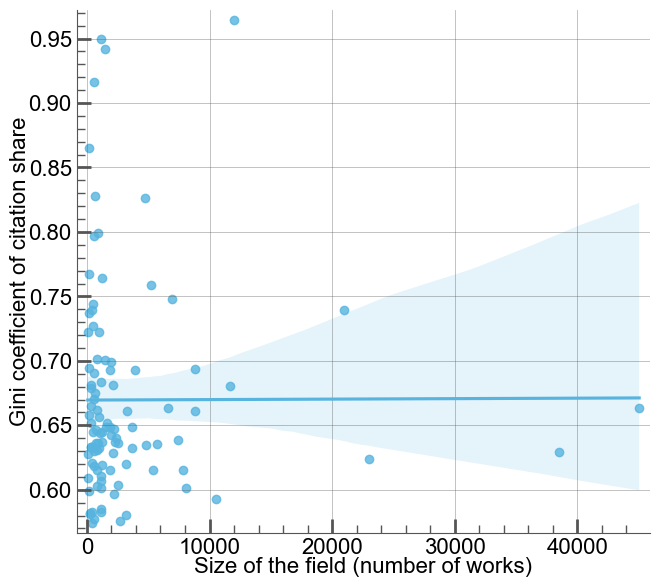

In [12]:
with aq.load_theme("scientific"):
    plt.figure(figsize=(7.4, 6.8))
    sns.regplot(data=group_topics_pandas[group_topics_pandas["number_of_works"]>30][1:], x="number_of_works", y="gini")
    plt.xlabel("Size of the field (number of works)", fontsize=16)
    plt.ylabel("Gini coefficient of citation share", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [13]:
import bar_chart_race as bcr

works_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))
group_topics_bcr = (
    works_topics_classified
    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])
    .group_by(["topic_name", "year"])
    .agg(
        pl.col("number_of_works").sum().alias("number_of_works"),
        pl.col("cited_by_count").sum().alias("cited_by_count"),
        pl.col("topic")
    )
).fill_null(0)
smoothing = 5
group_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])
topics_pivot = group_topics_bcr_pandas.pivot(index = "year", columns = "topic_name", values = "number_of_works")
topics_pivot = topics_pivot.fillna(0)
topics_pivot_smooth = topics_pivot.copy()
for index, row in topics_pivot.iterrows():
    if index<1973:
        debut = 1968
    else:
        debut = index - smoothing
    topics_pivot_smooth.loc[index,:] = sum([topics_pivot.loc[i,:] for i in range(debut, index+1)])
    
topics_pivot_smooth = topics_pivot.sort_index()
topics_pivot_smooth.index = pd.to_datetime(topics_pivot.index, format ='%Y')
bcr.bar_chart_race(
    df=topics_pivot_smooth,
    filename='../results/q1/topics/bcr_new_topics_nb5y.mp4',  # ou None pour afficher dans un notebook
    orientation='h',
    sort='desc',
    n_bars=5,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    period_length=2000,
    period_fmt='%Y',
    title='Evolution of the top topics along the years (Number of works - 5-year period)',
    bar_size=.95,
    interpolate_period=True
)

C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 127 () missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 131 (\x83) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roami

In [14]:
works_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))

group_topics_bcr = (
    works_topics_classified
    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])
    .group_by(["topic_name", "year"])
    .agg(
        pl.col("number_of_works").sum().alias("number_of_works"),
        pl.col("cited_by_count").sum().alias("cited_by_count"),
        pl.col("topic")
    )
).fill_null(0)

group_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])

topics_pivot = group_topics_bcr_pandas.pivot(index="year", columns="topic_name", values="number_of_works")
topics_pivot = topics_pivot.fillna(0).sort_index()

topics_pivot_cum = topics_pivot.cumsum()

topics_pivot_cum.index = pd.to_datetime(topics_pivot_cum.index, format='%Y')

bcr.bar_chart_race(
    df=topics_pivot_cum,
    filename='../results/q1/topics/bcr_new_topics_nbcumul.mp4',  
    orientation='h',
    sort='desc',
    n_bars=5,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=8,
    period_length=1500,
    period_fmt='%Y',
    title='Evolution of the top topics (Number of works - Cumulative)',
    bar_size=.95,
    interpolate_period=True
)

C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 127 () missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 131 (\x83) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roami

In [15]:
import bar_chart_race as bcr

works_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))
group_topics_bcr = (
    works_topics_classified
    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])
    .group_by(["topic_name", "year"])
    .agg(
        pl.col("number_of_works").sum().alias("number_of_works"),
        pl.col("cited_by_count").sum().alias("cited_by_count"),
        pl.col("topic")
    )
).fill_null(0)
smoothing = 5
group_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])
topics_pivot = group_topics_bcr_pandas.pivot(index = "year", columns = "topic_name", values = "cited_by_count")
topics_pivot = topics_pivot.fillna(0)
topics_pivot_smooth = topics_pivot.copy()
for index, row in topics_pivot.iterrows():
    if index<1973:
        debut = 1968
    else:
        debut = index - smoothing
    topics_pivot_smooth.loc[index,:] = sum([topics_pivot.loc[i,:] for i in range(debut, index+1)])
    
topics_pivot_smooth = topics_pivot.sort_index()
topics_pivot_smooth.index = pd.to_datetime(topics_pivot.index, format ='%Y')
bcr.bar_chart_race(
    df=topics_pivot_smooth,
    filename='../results/q1/topics/bcr_new_topics_citations5y.mp4',  
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=8,
    period_length=1600,
    period_fmt='%Y',
    title='Evolution of the top topics along the years (Number of citations - 5-year period)',
    bar_size=.95,
    interpolate_period=True
)

C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 127 () missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 131 (\x83) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roami

In [16]:
works_topics_classified = works_topics.filter(~pl.col("topic").is_in([-1, 0]))

group_topics_bcr = (
    works_topics_classified
    .select(["topic_name", "year", "mncs", "number_of_works", "cited_by_count", "topic"])
    .group_by(["topic_name", "year"])
    .agg(
        pl.col("number_of_works").sum().alias("number_of_works"),
        pl.col("cited_by_count").sum().alias("cited_by_count"),
        pl.col("topic")
    )
).fill_null(0)

group_topics_bcr_pandas = group_topics_bcr.to_pandas().dropna(subset=["topic_name"])

topics_pivot = group_topics_bcr_pandas.pivot(index="year", columns="topic_name", values="cited_by_count")
topics_pivot = topics_pivot.fillna(0).sort_index()

topics_pivot_cum = topics_pivot.cumsum()

topics_pivot_cum.index = pd.to_datetime(topics_pivot_cum.index, format='%Y')

bcr.bar_chart_race(
    df=topics_pivot_cum,
    filename='../results/q1/topics/bcr_new_topics_citationscumul.mp4',  
    orientation='h',
    sort='desc',
    n_bars=5,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=6,
    period_length=1200,
    period_fmt='%Y',
    title='Evolution of the top topics (Number of citations - Cumulative)',
    bar_size=.95,
    interpolate_period=True
)

C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 127 () missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roaming\Python\Python312\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 131 (\x83) missing from font(s) Arial.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\noahr\AppData\Roami

In [17]:
group_topics_test = group_topics_pandas[~group_topics_pandas["topic"].isin([-1,0])] 
group_topics_test = group_topics_test[group_topics_test["topic"].isin([1,2,52, 6,36])]
group_topics_test = group_topics_test[group_topics_test["number_of_works_2024"]>=10]
for i in range(2012, 2025):
    
    group_topics_test[f"cited_by_count_{i}_viz"] = (group_topics_test[f"cited_by_count_{i}"] -  group_topics_test[f"cited_by_count_{i}"].mean())
    group_topics_test[f"number_of_works_{i}_log"] = group_topics_test[f"number_of_works_{i}"]
    group_topics_test[f"number_of_works_{i}_viz"] = (group_topics_test[f"number_of_works_{i}_log"] -  group_topics_test[f"number_of_works_{i}_log"].mean())

group_topics_test

,topic,mncs,number_of_works,cited_by_count,cited_by_count_2012,cited_by_count_2013,cited_by_count_2014,cited_by_count_2015,cited_by_count_2016,cited_by_count_2017,...,number_of_works_2021_viz,cited_by_count_2022_viz,number_of_works_2022_log,number_of_works_2022_viz,cited_by_count_2023_viz,number_of_works_2023_log,number_of_works_2023_viz,cited_by_count_2024_viz,number_of_works_2024_log,number_of_works_2024_viz
2,1.0,1.149696,38478.0,1716250.0,4.892313,4.968250,5.077445,4.885514,4.794378,4.695024,...,1400.8,0.744217,2124.0,1533.2,0.565097,1742.0,1237.2,0.122740,1835.0,1293.8
3,2.0,0.910058,11678.0,378167.0,3.755749,3.711598,3.645364,3.526892,3.460995,3.470841,...,-73.2,0.242432,535.0,-55.8,0.036779,472.0,-32.8,0.036223,536.0,-5.2
7,6.0,0.964070,10540.0,412061.0,4.522496,4.454208,4.373301,4.133153,4.079497,3.914132,...,-299.2,-0.803033,173.0,-417.8,-0.801889,181.0,-323.8,-0.983661,218.0,-323.2
37,36.0,0.948030,3177.0,111770.0,3.804560,3.774755,3.959669,3.684631,3.715352,3.646403,...,-471.2,-0.655892,112.0,-478.8,-0.300588,108.0,-396.8,0.058945,103.0,-438.2
53,52.0,0.967927,378.0,12135.0,3.970000,3.831461,3.742268,3.603774,3.594059,3.274336,...,-557.2,0.472277,10.0,-580.8,0.500601,21.0,-483.8,0.765752,14.0,-527.2


<Figure size 640x480 with 0 Axes>

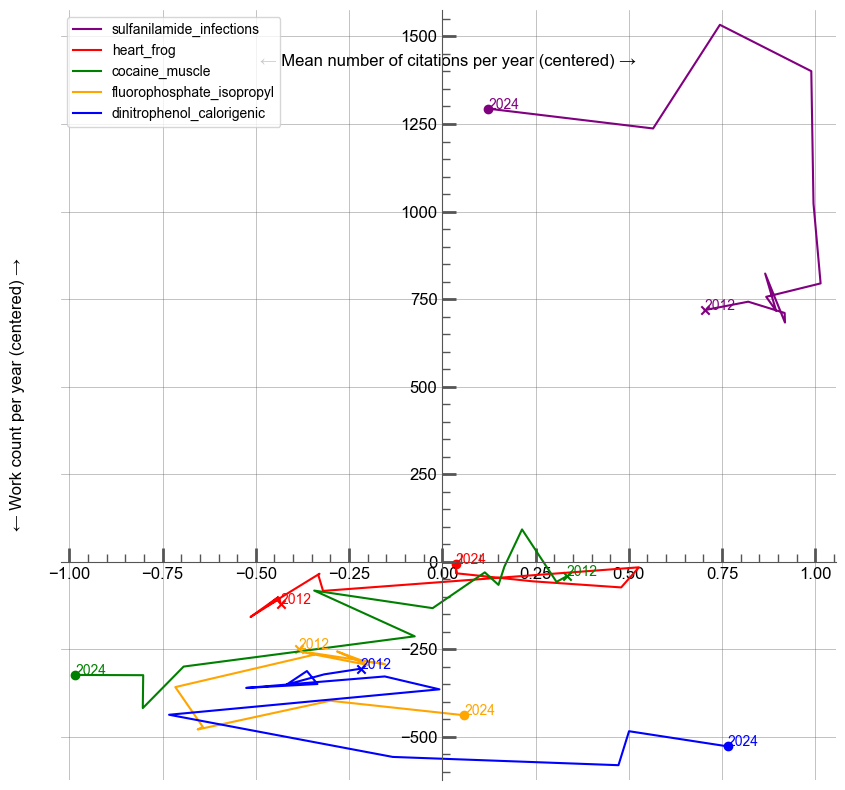

In [18]:
with aq.load_theme("scientific"):
    plt.figure(figsize = (10, 10))
    for index, row in group_topics_test.iterrows():
        if row["topic"] == 2:
            color="red"
        if row["topic"] == 6:
            color="green"
        if row["topic"] == 52:
            color = "blue"
        if row["topic"] == 36:
            color = "orange"
        if row["topic"] == 1:
            color = "purple"
        x = [row[f"cited_by_count_{i}_viz"] for i in range(2012, 2025)]
        y = [row[f"number_of_works_{i}_viz"] for i in range(2012, 2025)]
        plt.plot(x, y, color=color, label=row["topic_name"])
        plt.scatter(row["cited_by_count_2012_viz"], row["number_of_works_2012_viz"], marker="x", color=color)
        plt.scatter(row["cited_by_count_2024_viz"], row["number_of_works_2024_viz"],  color=color)
        plt.text(row["cited_by_count_2012_viz"], row["number_of_works_2012_viz"], "2012", color=color)
        plt.text(row["cited_by_count_2024_viz"], row["number_of_works_2024_viz"], "2024", color=color)  
        
    # plt.xlim(-20,40)
    # plt.ylim(-20,200)
    # plt.xlim(-10,10)
    # plt.ylim(-50,70)
    plt.xlabel("← Mean number of citations per year (centered) →", labelpad = - 380) # labelpad = décalage du label
    plt.ylabel("← Work count per year (centered) →", labelpad = 270)
    # # position of the two axes
    ax = plt.gca()
    ax.spines['left'].set_position('zero')   # axe Y à x=0
    ax.spines['bottom'].set_position('zero') # axe X à y=0
    plt.legend()
    plt.show()

In [19]:
group_topics_test = group_topics_pandas[~group_topics_pandas["topic"].isin([-1,0])] 
years = list(range(2012, 2025))

for i in range(1, len(years)):
    y_prev, y_curr = years[i-1], years[i]
    col_prev = f"cited_by_count_{y_prev}"
    col_curr = f"cited_by_count_{y_curr}"
    new_col = f"delta_cited_by_count_{y_curr}"
    group_topics_test[new_col] = group_topics_test[col_curr] - group_topics_test[col_prev]

for i in range(1, len(years)):
    y_prev, y_curr = years[i-1], years[i]
    col_prev = f"number_of_works_{y_prev}"
    col_curr = f"number_of_works_{y_curr}"
    new_col = f"delta_number_of_works_{y_curr}"
    group_topics_test[new_col] = group_topics_test[col_curr] - group_topics_test[col_prev]

C:\Users\noahr\AppData\Local\Temp\ipykernel_9536\3864279943.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_topics_test[new_col] = group_topics_test[col_curr] - group_topics_test[col_prev]
C:\Users\noahr\AppData\Local\Temp\ipykernel_9536\3864279943.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_topics_test[new_col] = group_topics_test[col_curr] - group_topics_test[col_prev]
C:\Users\noahr\AppData\Local\Temp\ipykernel_9536\3864279943.py:9: SettingWithCopyWarning: 
A value is trying to be

In [25]:
years = list(range(2012, 2025))
pairs = []

for y in years[1:-1]:  
    cited_col = f"delta_cited_by_count_{y}"
    works_col = f"delta_number_of_works_{y+1}"
    temp = group_topics_test[[cited_col, works_col]].copy()
    temp = temp.rename(columns={
        cited_col: "delta_cited",
        works_col: "delta_works_next"
    })
    temp["year"] = y
    pairs.append(temp)

df_corr = pd.concat(pairs, ignore_index=True)

corr = df_corr[["delta_cited", "delta_works_next"]].corr().iloc[0,1]
print("Corrélation globale :", corr)

Corrélation globale : 0.05810159192000318


In [28]:
works_modelling = works_topics.select([
    "year",
    "mncs",
    "topic_name",
    "primary_topic",
    "countries_distinct_count",
    "institutions_distinct_count",
    "referenced_works_count",
    "authors_count",
    "review",
    "meta_analysis",
    "mean_past_contributions_authors",
    "mean_past_mncs_authors",
    "mean_past_contributions_institutions",
    "mean_past_mncs_institutions",
    "past_contributions_topic",
    "mean_past_mncs_topic",
])
works_modelling.write_parquet("../data/modelling/works_modelling.parquet")

In [29]:
works_modelling = pd.read_parquet("../data/modelling/works_modelling.parquet")
works_quantitative = works_modelling.drop(columns=["review", "meta_analysis","primary_topic"])
data_corr = works_quantitative.corr()
#data_corr = data_corr.to_pandas()
mask = np.triu(np.ones_like(data_corr, dtype=bool), k = 1)
cmap = sns.light_palette("royalblue", as_cmap=True)
sns.heatmap(data_corr, cmap = "bwr", mask = mask, annot = True, fmt = ".1f", center = 0, vmin = 0, vmax = 1) #RdBu_r Spectral vlag
plt.grid(False)
plt.show()

ValueError: could not convert string to float: 'action_sodium'

In [30]:
import polars as pl


works_topics = works_topics.with_columns(
    ((pl.col("year") // 10) * 10).alias("decade")
)

works_topics = works_topics.filter(pl.col("decade").is_between(1900, 2029))

decades = works_topics.select("decade").unique().to_series().sort().to_list()

dfs_by_decade = {
    decade: works_topics.filter(pl.col("decade") == decade)
    for decade in decades
}

for decade, df in dfs_by_decade.items():
    print(f"{decade}s : {df.height} works")

dfs_by_decade

1900s : 30 works
1910s : 658 works
1920s : 1061 works
1930s : 1555 works
1940s : 1869 works
1950s : 2385 works
1960s : 9333 works
1970s : 28769 works
1980s : 60618 works
1990s : 100865 works
2000s : 152114 works
2010s : 194754 works
2020s : 135350 works


{1900: shape: (30, 36)
 ┌─────────────┬──────┬─────────────┬──────────┬───┬─────────────┬────────────┬────────────┬────────┐
 │ title       ┆ year ┆ primary_top ┆ abstract ┆ … ┆ topic_name  ┆ past_contr ┆ mean_past_ ┆ decade │
 │ ---         ┆ ---  ┆ ic          ┆ ---      ┆   ┆ ---         ┆ ibutions_t ┆ mncs_topic ┆ ---    │
 │ str         ┆ i64  ┆ ---         ┆ str      ┆   ┆ str         ┆ opic       ┆ ---        ┆ i64    │
 │             ┆      ┆ str         ┆          ┆   ┆             ┆ ---        ┆ f64        ┆        │
 │             ┆      ┆             ┆          ┆   ┆             ┆ i32        ┆            ┆        │
 ╞═════════════╪══════╪═════════════╪══════════╪═══╪═════════════╪════════════╪════════════╪════════╡
 │ on the phar ┆ 1909 ┆ Chemistry   ┆          ┆ … ┆ action_sodi ┆ 0          ┆ 1.0        ┆ 1900   │
 │ macological ┆      ┆ and Stereoc ┆          ┆   ┆ um          ┆            ┆            ┆        │
 │ action …    ┆      ┆ hemistry …  ┆          ┆   ┆       

In [31]:
for decade, df in dfs_by_decade.items():
    df.write_parquet(f"../data/modelling/works_modelling_{decade}s.parquet")
